# YOLOv4

YOLOv4 cũng được xây dựng dựa trên ý tưởng của YOLOv3 nhưng được thêm cả tỷ những cải tiến mới như BoF, BoS để cải thiện độ chính xác và tốc độ của mô hình. Lý do gọi YOLOv4 là kỷ nguyên mới vì YOLOv4 là mô hình YOLO đầu tiên không được phát triển bởi Joseph Redmon - tác giả của các mô hình YOLO đằng trước, vì tác giả tuyên bố ngưng phát triển YOLO vì một số lý do; thay vào đó những mô hình YOLO sau đó được phát triển bởi những tác giả khác và YOLOv4 được phát triển bởi Alexey Bochkovskiy.

### Bag of Freebies (BoF)

Bag of Freebies là tập những kĩ thuật hoặc phương pháp mà thay đổi chiến thuật training hoặc chi phí training để có thể cải thiện độ chính xác của mô hình
- Data Augmentation: Mở rộng dữ liệu huấn luyện
- Semantic Distribution Bias in Datasets: Inherent bias là một mối quan ngại lớn vì nó đên từ sự phong phú trong tập dữ liệu dùng để train model. Nếu phân bố dữ liệu có vấn đề bias, nó có thể kéo quá trình training đến hội tụ đến cực tiểu địa phương và không thể khái quát hóa được. Nhìn chung vấn đề này từ 2 nguyên nhân chính từ tập dữ liệu

- Objective Function of BBox Regression: Về loss function của YOLO không còn sử dụng MSE nữa mà sử dụng cách tiếp cận khác là Anchor based approach. Cụ thể là sử dụng độ lệch tương ứng của những điểm náy, phương pháp kinh điển là IOU loss. Ngoài ra còn có GIoU loss, CIoU loss, DIoU loss.

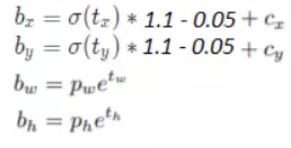

### Bag of Specials (BoS)

Khác với BoF, Bag of Specials là tập những kĩ thuật hoặc phương pháp mà thay đổi cấu trúc của mô hình để cải thiện độ chính xác của mô hình. Cụ thể hơn, những plugin modules này giúp tăng thêm một chút thuộc tính của model như mở rộng receptive field ( định nghĩa này mình sẽ nói kĩ hơn ở dưới ), thêm cơ chế attention, tăng cường thêm khả năng tích hợp, ... và post-processing để hiển thị kết quả dự đoán của model

### Sử dụng nhiều anchors cho một ground truth Bounding Box

Với YOLOv3, chỉ anchor có IOU lớn nhất làm positive anchor. Những anchor có IOU dưới một ngưỡng gọi là negative, còn lại là sẽ bỏ qua trong quá trình tính loss

YOLOv4 sử dụng cách tiếp cận khác, những anchor bị thừa sẽ được chọn làm positive anchor, có ảnh hưởng trong quá trình tính toán thay vì bỏ đi.

Tác dụng của việc này vẫn chưa được làm rõ trong YOLOv4, tuy nhiên có khả năng là điều này làm giảm đi vấn đề class imbalanced giữa background và foreground thường thấy trong các mô hình Object Detection, được nói cụ thể trong Focal Loss.

### Receptive field

Receptive field là kích thước của một vùng trong không gian đầu vào được nhìn thấy bởi 1 pixel output. Không như mang Fully Connected, một node có thể phụ thuộc vào toàn bộ input đầu vào của mạng thì trong CNN, 1 pixel output chỉ phụ thuộc vào 1 vùng của ảnh input, vùng này chính là receptive field.

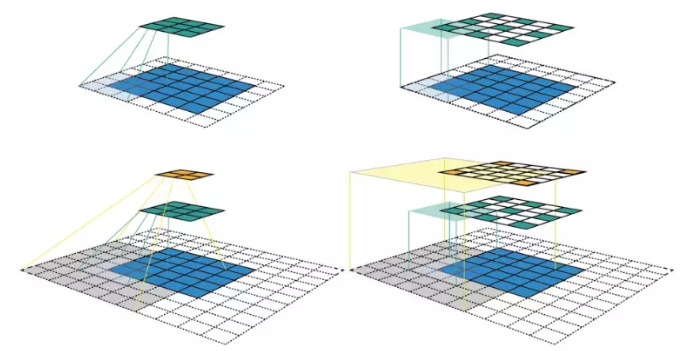

Qua hình vẽ thì ta thấy một pixel ở tầng càng cao thì nó bao phủ được càng nhiều pixel ở những tầng dưới hơn

### Architechture

- Phần Backbone có thể sử dụng những mạng sẵn có được train trên tập ImageNet như VGG, ResNet, DenseNet, ... ( nếu sử dụng trên những nền tảng có GPU ) hoặc SqueezeNet, MobileNet, ShuffleNet ( nếu sử dụng trên những nền tảng chỉ có CPU ).

- Phần Head: Gồm one stage và two stage. Two stage cổ điển mà quá trình output chia làm 2 phần là localization và classification. One stage thì không cần phải chia làm 2 phần mà chỉ cần output 1 lần.

- Phần Neck được thêm vào để tăng cường khả năng tích hợp của mô hình, giúp mô hình có thể học được những feature quan trọng hơn.

=> Tóm lại, YOLOv4 gồm 3 phần chính với các chi tiết sau:
- Backbone : CSPDarknet53
- Neck: SPP ( Spatial Pyramid Pooling ), PAN ( Path Aggregation Network )
- Head: YOLOv3


Bag of Freebies (BoF) sử dụng cho phần Backbone:
- CutMix và Mosaic data augmentation: CutMix là một phương pháp data augmentation mà thay thế một phần của ảnh bằng một phần của ảnh khác. Mosaic data augmentation là một phương pháp data augmentation mà kết hợp 4 ảnh thành 1 ảnh mới.
- DropBlock regularization: là một phương pháp regularization mà thay vì tắt ngẫu nhiên một số node như Dropout, nó sẽ tắt ngẫu nhiên một số block.
- Class label smoothing: là một phương pháp regularization mà thay vì gán nhãn 0 hoặc 1 cho một class, nó sẽ gán nhãn 0.1 hoặc 0.9.

Bag of Specials (BoS) sử dụng cho phần Backbone:
- Mish activation: là một hàm activation mà kết hợp giữa ReLU và Sigmoid.
- CSP block: là một kiến trúc block mà tách input thành 2 phần, thực hiện một số phép tính trên mỗi phần, và sau đó nối 2 phần lại với nhau.
- Multi-input weighted residual connection: là một kiến trúc mà thêm một số input vào một block và thực hiện một số phép tính trên mỗi input.

Bag of Freebies (BoF) sử dụng cho phần Detector:
- CIoU-loss: là một hàm loss mà kết hợp giữa IoU-loss và GIoU-loss.
- Cross mini Batch Normalization: là một phương pháp normalization mà thay vì tính mean và variance trên một batch, nó sẽ tính mean và variance trên một số batch.
- DropBlock regularization: là một phương pháp regularization mà tắt ngẫu nhiên một số block.
- Mosaic data augmentation
- Seft-Adversarial Training: là một phương pháp training mà thêm một số noise vào input.
- Eliminate grid sensitivity: là thêm một số noise vào output.
- Multiple anchors: là thêm một số anchor vào mỗi grid.
- Cosine annealing scheduler: là một phương pháp mà giảm learning rate theo cosine function.
- Optimal hyperparameters with Genetic Algorithm: là tìm kiếm hyperparameters tốt nhất với Genetic Algorithm.

Bag of Specials (BoS) sử dụng cho phần Detector:
- Mish activation
- SPP-block: một kiến trúc block mà thay đổi kích thước của input và thực hiện một số phép tính trên mỗi kích thước.
- SAM-block: một kiến trúc block mà thêm một số attention vào input.
- PAN: một kiến trúc mà thêm một số path vào input.
- DIoU-NMS: DIoU-NMS là một phương pháp NMS mà kết hợp giữa IoU-NMS và DIoU-NMS.

***Ngắn gọn hơn***

Kiến trúc của YOLOv3 nâng cấp lên YOLOv4 được tóm tắt như sau:

- Backbone: DarkNet53 --> CSPDarkNet53, áp dụng thêm DropBlock
- Neck: FPN --> SPP + PAN
- Head: Giữ nguyên từ YOLOv3

Các thay đổi khác trong YOLOv4 bao gồm:
- Data Augmentation: Mosaic Augmentation, Self-Adversarial Training
- Loss function: Regression Loss từ squared loss --> CIoU Loss
- Anchor Box: 1 anchor --> nhiều anchors
- Label Smoothing
- Loại bỏ Grid Sensitivity
- Cosine Learning Rate schedule